# KMeans

In [28]:
""" 
cd .\kmeans\
jupyter nbconvert --to markdown kmeans.ipynb --output README.md
 """

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [13]:
X = df.drop(['User ID','Purchased'],axis=1)
X.head()

,Gender,Age,AnnualSalary
0,Male,35,20000
1,Male,40,43500
2,Male,49,74000
3,Male,40,107500
4,Male,25,79000


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
X['Gender']= label_encoder.fit_transform(X['Gender'])
X['Gender'].unique()

array([1, 0])

In [15]:
X.head()

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000


In [16]:
X= X.values # convert to numpy array [must for plotting]
X[:5]

array([[     1,     35,  20000],
       [     1,     40,  43500],
       [     1,     49,  74000],
       [     1,     40, 107500],
       [     1,     25,  79000]], dtype=int64)

In [29]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
 )
y_km = km.fit_predict(X)

In [30]:
km.cluster_centers_

array([[3.86138614e-01, 4.50198020e+01, 1.26881188e+05],
       [5.41484716e-01, 3.80720524e+01, 7.55152838e+04],
       [4.64705882e-01, 3.99264706e+01, 3.66852941e+04]])

In [31]:
centers = km.cluster_centers_
centers[0,0]
centers[0,1]

45.019801980198025

In [32]:
np.unique(y_km)

array([0, 1, 2])

In [33]:
y_km[:10]

array([2, 2, 1, 0, 1, 2, 0, 1, 1, 2])

In [38]:
(y_km == 0)[:10]

array([False, False, False,  True, False, False,  True, False, False,
       False])

In [43]:
print(f"row 3: `{X[3,:]}` belongs to cluster {y_km[3]}")

row 3: `[     1     40 107500]` belongs to cluster 0


In [46]:
print("Rows that belong to cluster 0:")
print(X[(y_km == 0),:][:4])

Rows that belong to cluster 0:
[[     1     40 107500]
 [     0     46 132500]
 [     0     42 108000]
 [     0     33 149000]]


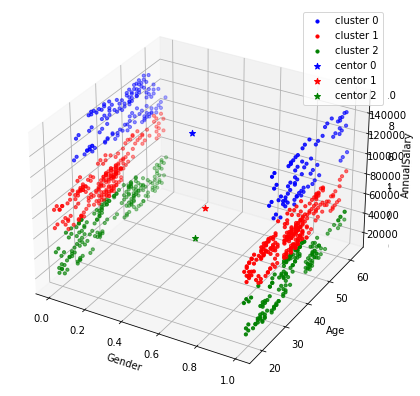

In [22]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection ='3d')
ax = plt.axes(projection ='3d')
ax.scatter(X[y_km == 0,0],X[y_km == 0,1],X[y_km == 0,2], s = 10 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_km == 1,0],X[y_km == 1,1],X[y_km == 1,2], s = 10 , color = 'red', label = "cluster 1")
ax.scatter(X[y_km == 2,0],X[y_km == 2,1],X[y_km == 2,2], s = 10 , color = 'green', label = "cluster 2")

ax.scatter(centers[0,0],centers[0,1],centers[0,2], s = 40 , color = 'blue', marker='*',label = "centor 0")
ax.scatter(centers[1,0],centers[1,1],centers[1,2], s = 40 ,color = 'red',marker='*',  label = "centor 1")
ax.scatter(centers[2,0],centers[2,1],centers[2,2], s = 40 , color = 'green',marker='*',label = "centor 2")

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('AnnualSalary')
ax.legend()
plt.show()

c:\Users\soiko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


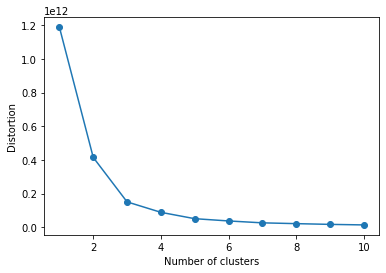

In [23]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [49]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
 )
y_km = km.fit_predict(X)
centers = km.cluster_centers_
centers

array([[5.31157270e-01, 3.87952522e+01, 8.20430267e+04],
       [5.07633588e-01, 3.85000000e+01, 5.55133588e+04],
       [4.78672986e-01, 4.01848341e+01, 2.89383886e+04],
       [3.73684211e-01, 4.45578947e+01, 1.28368421e+05]])

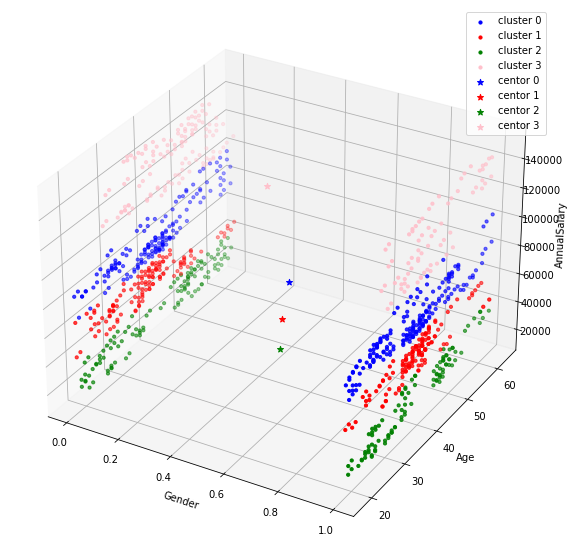

In [50]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection ='3d')
ax.scatter(X[y_km == 0,0],X[y_km == 0,1],X[y_km == 0,2], s = 10 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_km == 1,0],X[y_km == 1,1],X[y_km == 1,2], s = 10 , color = 'red', label = "cluster 1")
ax.scatter(X[y_km == 2,0],X[y_km == 2,1],X[y_km == 2,2], s = 10 , color = 'green', label = "cluster 2")
ax.scatter(X[y_km == 3,0],X[y_km == 3,1],X[y_km == 3,2], s = 10 , color = 'pink', label = "cluster 3")

ax.scatter(centers[0,0],centers[0,1],centers[0,2], s = 40 , color = 'blue', marker='*',label = "centor 0")
ax.scatter(centers[1,0],centers[1,1],centers[1,2], s = 40 ,color = 'red',marker='*',  label = "centor 1")
ax.scatter(centers[2,0],centers[2,1],centers[2,2], s = 40 , color = 'green',marker='*',label = "centor 2")
ax.scatter(centers[3,0],centers[3,1],centers[3,2], s = 40 , color = 'pink',marker='*',label = "centor 3")

ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('AnnualSalary')
ax.legend()
plt.show()

In [26]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [27]:
model = KMeans()
param = {
    "n_clusters": [2,3,4,5,6,10],
    "init": ['random','k-means++'],
    "n_init": [10,20],
}
search = GridSearchCV(
    model,
    param,
    n_jobs=-1,
    cv=5
)
res=search.fit(X)
print(res.best_params_)

{'init': 'random', 'n_clusters': 10, 'n_init': 20}
